In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fold_path=['1_LS_CV','2_SPEC_CV','3_AEFS_CV','4_MCFS_CV','5_PFA_CV','6_Inf-FS_CV','7_AgnoS-S_CV','8_CAE_CV','9_FAE_CV']

In [3]:
cv_times_from=0
cv_times_to=5

In [4]:
number_feature=[10,25,40,55,70,85]
file_path="/log"

acc_results_mean=[]
acc_results_std=[]
rec_results_mean=[]
rec_results_std=[]

algorithm_name=[]

for path_i in fold_path:
    acc_results_mean_i=[]
    acc_results_std_i=[]
    rec_results_mean_i=[]
    rec_results_std_i=[]

    for number_feature_i in number_feature:
        algorithm_name_i=path_i.split("_")[1]
        
        if path_i=="9_FAE_CV":
            path_results="./"+path_i+file_path+str(number_feature_i)+"/"+algorithm_name_i+"_results_bias_True.csv" 
            results_analysis=np.array(pd.read_csv(path_results,header=None)) 
            
            results_analysis_test_acc__=results_analysis[:,3]
            cv_cal_times=len(results_analysis_test_acc__)
            
            results_analysis_test_acc_=results_analysis_test_acc__[np.where(results_analysis[:,3]>=0)]
            
            if cv_cal_times >=(cv_times_to-cv_times_from):
                print("cv times: ",cv_cal_times)
                results_analysis_test_acc=results_analysis_test_acc_[cv_times_from:cv_times_to]
                results_analysis_linear_rec=results_analysis[:,4][np.where(results_analysis[:,4]>=0)][cv_times_from:cv_times_to]
                
                results_analysis_linear_rec=results_analysis_linear_rec[np.where(results_analysis_linear_rec<3000)]
            
        else:
            path_results="./"+path_i+file_path+str(number_feature_i)+"/"+path_i.split("_")[1]+"_results.csv" 
            results_analysis=np.array(pd.read_csv(path_results,header=None)) 
            
            results_analysis_test_acc__=results_analysis[:,3]
            cv_cal_times=len(results_analysis_test_acc__)
            
            results_analysis_test_acc_=results_analysis_test_acc__[np.where(results_analysis[:,3]>=0)]
            
            if cv_cal_times >=(cv_times_to-cv_times_from):
                print("cv times: ",cv_cal_times)
                results_analysis_test_acc=results_analysis_test_acc_[cv_times_from:cv_times_to]
                results_analysis_linear_rec=results_analysis[:,4][np.where(results_analysis[:,4]>=0)][cv_times_from:cv_times_to]
                
                results_analysis_linear_rec=results_analysis_linear_rec[np.where(results_analysis_linear_rec<3000)]

        acc_results_mean_i.append(np.mean(results_analysis_test_acc))
        acc_results_std_i.append(np.std(results_analysis_test_acc))
        rec_results_mean_i.append(np.mean(results_analysis_linear_rec))
        rec_results_std_i.append(np.std(results_analysis_linear_rec))

    algorithm_name.append(algorithm_name_i)
    acc_results_mean.append(acc_results_mean_i)
    acc_results_std.append(acc_results_std_i)
    rec_results_mean.append(rec_results_mean_i)
    rec_results_std.append(rec_results_std_i)

cv times:  5
cv times:  5
cv times:  5
cv times:  5
cv times:  5
cv times:  5
cv times:  5
cv times:  5
cv times:  5
cv times:  5
cv times:  5
cv times:  5
cv times:  5
cv times:  5
cv times:  5
cv times:  5
cv times:  5
cv times:  5
cv times:  20
cv times:  19
cv times:  20
cv times:  19
cv times:  19
cv times:  19
cv times:  50
cv times:  50
cv times:  50
cv times:  50
cv times:  50
cv times:  50
cv times:  5
cv times:  5
cv times:  5
cv times:  5
cv times:  5
cv times:  5
cv times:  5
cv times:  5
cv times:  5
cv times:  5
cv times:  5
cv times:  5
cv times:  6
cv times:  6
cv times:  5
cv times:  5
cv times:  5
cv times:  5
cv times:  5
cv times:  5
cv times:  5
cv times:  5
cv times:  5
cv times:  5


In [5]:
len(algorithm_name)

9

In [6]:
rec_mean=np.mean(np.array(rec_results_mean),axis=1)

In [7]:
np.array(acc_results_mean)

array([[0.07923077, 0.10769231, 0.10820513, 0.1175641 , 0.10653846,
        0.10012821],
       [0.05217949, 0.04153846, 0.04333333, 0.04794872, 0.04615385,
        0.04679487],
       [0.50705128, 0.74833333, 0.82089744, 0.85423077, 0.87474359,
        0.87333333],
       [0.03897436, 0.04961538, 0.05589744, 0.06923077, 0.05179487,
        0.05564103],
       [0.47846154, 0.74410256, 0.83192308, 0.87307692, 0.88974359,
        0.89717949],
       [0.11384615, 0.21961538, 0.16769231, 0.13051282, 0.14346154,
        0.10935897],
       [0.29134615, 0.23269231, 0.44666667, 0.22115385, 0.23862179,
        0.22029915],
       [0.66205128, 0.8325641 , 0.86910256, 0.88705128, 0.90551282,
        0.91551282],
       [0.6924359 , 0.8424359 , 0.86782051, 0.89397436, 0.90538462,
        0.91487179]])

In [8]:
rec_std=np.std(np.array(rec_results_mean),axis=1)

In [9]:
acc_mean=np.mean(np.array(acc_results_mean),axis=1)

In [10]:
acc_std=np.std(np.array(acc_results_mean),axis=1)

In [11]:
np.array(rec_results_mean).shape

(9, 6)

In [12]:
rec_mean_outlier=np.where(rec_mean>0.2)[0]

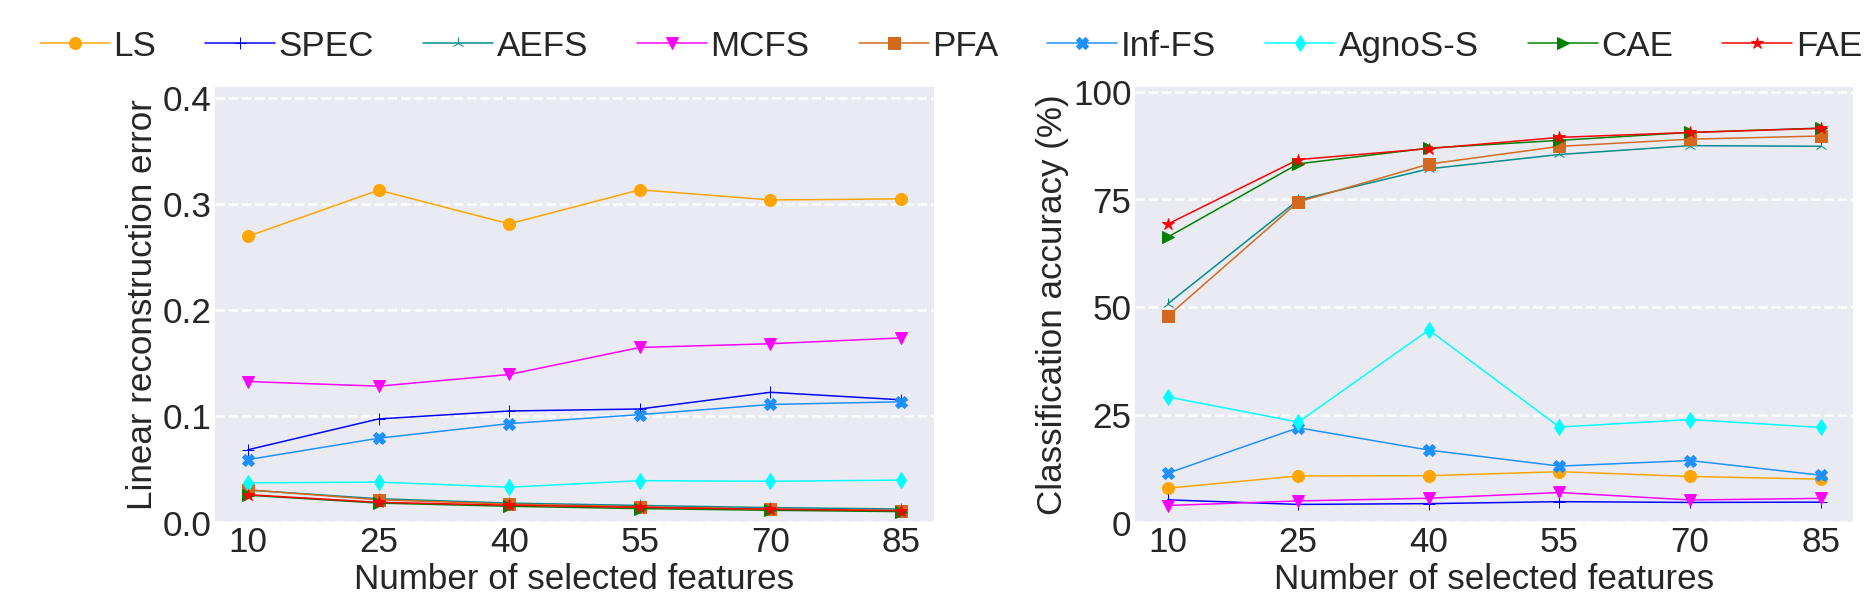

In [13]:
plt.style.use('seaborn-dark')

names=algorithm_name

selected_features = [10,25,40,55,70,85]

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(26,8))

ax1.grid(True,linestyle='--',linewidth = 2.5,zorder=-1,axis="y")

ax1.set_xticks(selected_features)
ax1.set_xlabel('Number of selected features', fontsize = 35)
ax1.set_yticks(np.arange(0,0.41,0.1))
ax1.set_ylabel('Linear reconstruction error', fontsize = 35)
ax1.tick_params(labelsize=35)
ax1.set_ylim([0, 0.41])

ax2.grid(True,linestyle='--',linewidth = 2.5,zorder=-1,axis="y")
ax2.set_xticks(selected_features)
ax2.set_xlabel('Number of selected features', fontsize =35)
ax2.set_yticks(np.arange(0,101,25))
ax2.set_ylabel('Classification accuracy (%)', fontsize = 35)
ax2.tick_params(labelsize=35)
ax2.set_ylim([0, 101])

markers=['o','+','2','v','s','X','d','>','*','<']
cs=['orange','blue','darkcyan','fuchsia','chocolate','dodgerblue','aqua','green','red','purple']

for i in np.arange(len(names)):
    ax1.plot(selected_features, rec_results_mean[i], marker=markers[i], c=cs[i],ms=12)

for i in np.arange(len(names)):
    ax2.plot(selected_features, np.array(acc_results_mean[i])*100, marker=markers[i], c=cs[i],ms=12)

plt.subplots_adjust(right=1,wspace =0.28,hspace =0)

fig.legend(labels=names,fontsize=35, loc='upper center', bbox_to_anchor=(0.508,1.05),ncol=9,handletextpad=0.1,columnspacing=1.4, fancybox=True,framealpha=0.1,shadow=True)

plt.show()

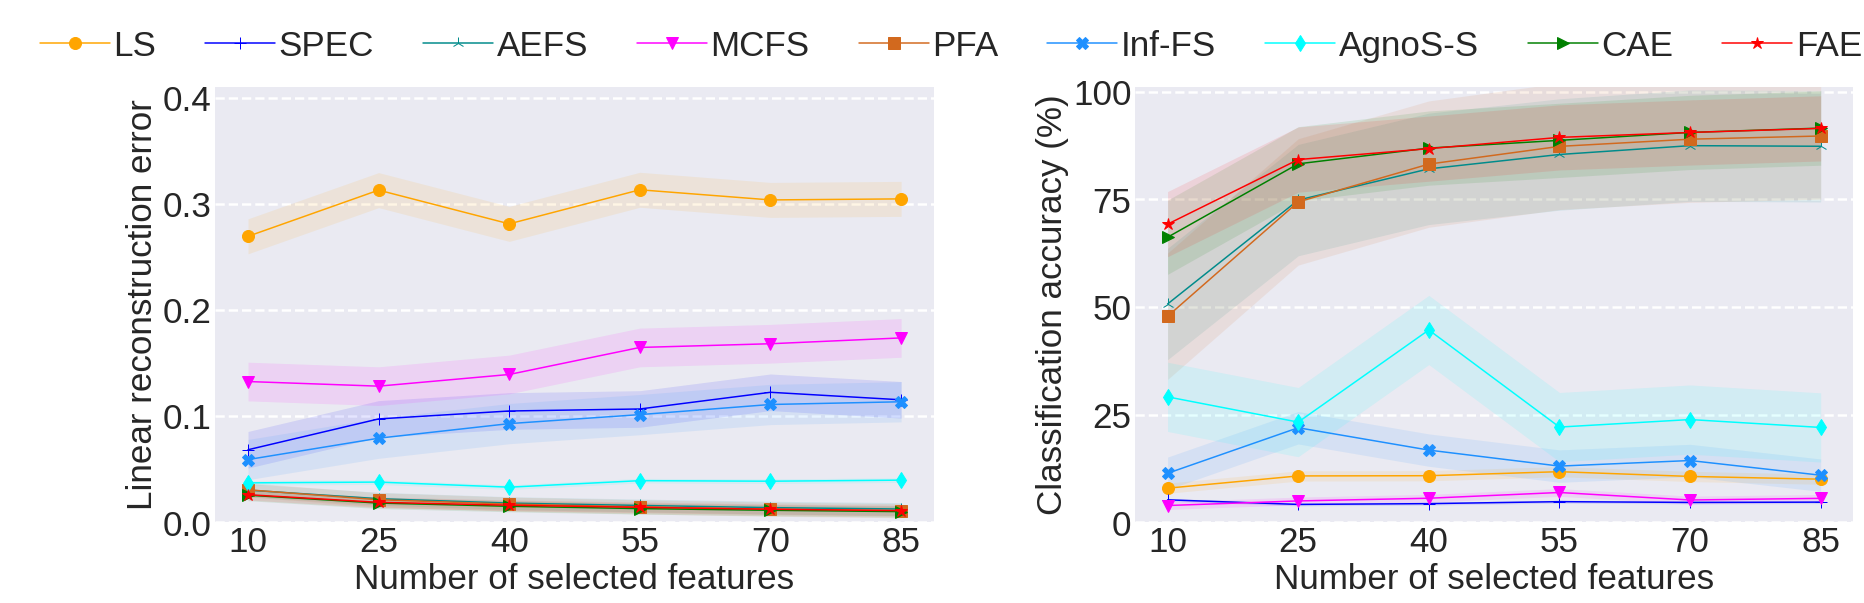

In [14]:
plt.style.use('seaborn-dark')

names=algorithm_name

selected_features = [10,25,40,55,70,85]

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(26,8))

ax1.grid(True,linestyle='--',linewidth = 2.5,zorder=-1,axis="y")

ax1.set_xticks(selected_features)
ax1.set_xlabel('Number of selected features', fontsize = 35)
ax1.set_yticks(np.arange(0,0.41,0.1))
ax1.set_ylabel('Linear reconstruction error', fontsize = 35)
ax1.tick_params(labelsize=35)
ax1.set_ylim([0, 0.41])

ax2.grid(True,linestyle='--',linewidth = 2.5,zorder=-1,axis="y")
ax2.set_xticks(selected_features)
ax2.set_xlabel('Number of selected features', fontsize =35)
ax2.set_yticks(np.arange(0,101,25))
ax2.set_ylabel('Classification accuracy (%)', fontsize = 35)
ax2.tick_params(labelsize=35)
ax2.set_ylim([0, 101])

markers=['o','+','2','v','s','X','d','>','*','<']
cs=['orange','blue','darkcyan','fuchsia','chocolate','dodgerblue','aqua','green','red','purple']

for i in np.arange(len(names)):
    ax1.plot(selected_features, rec_results_mean[i], marker=markers[i], c=cs[i],ms=12)
    ax1.fill_between(selected_features, rec_results_mean[i]-rec_std[i], rec_results_mean[i]+rec_std[i], color=cs[i], alpha=0.1,linewidth=0.0)

for i in np.arange(len(names)):
    ax2.plot(selected_features, np.array(acc_results_mean[i])*100, marker=markers[i], c=cs[i],ms=12)
    ax2.fill_between(selected_features, np.array(acc_results_mean[i])*100-np.array(acc_std[i])*100, np.array(acc_results_mean[i])*100+np.array(acc_std[i])*100, color=cs[i], alpha=0.1,linewidth=0.0)
plt.subplots_adjust(right=1,wspace =0.28,hspace =0)

plt.subplots_adjust(right=1,wspace =0.28,hspace =0)

fig.legend(labels=names,fontsize=35, loc='upper center', bbox_to_anchor=(0.508,1.05),ncol=9,handletextpad=0.1,columnspacing=1.4, fancybox=True,framealpha=0.1,shadow=True)

plt.show()